I can't write poetry, I can't paint a picture.  But I can configure matrix transformations to replicate Conway's game of life and seed a starting state to show you why I love you.

Ali I love you - with out you I'm a boring oscillator but together we're stable forever.

In [1]:
import numpy as np
from scipy.signal import convolve2d

# There are many ways to do this, the rules for the cellular automaton simple.  
# A nice technique to do this in essentially a single step is to acheive it via 2D matrix convolution.
def conway(Grid):
    template = np.array([[1,1,1],[1,1,1],[1,1,1]])
    b = convolve2d(Grid, template, mode='same', boundary='wrap') - Grid
    c = np.zeros(b.shape)

    c[np.where((b == 2) & (Grid == 1))] = 1
    c[np.where((b == 3) & (Grid == 1))] = 1
    c[np.where((b == 3) & (Grid == 0))] = 1
    
    return c

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pylab as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation, anim_to_html

# Render the simulation as described by the author of the very excelent JSAnimation (who also has a Life example)
def run_simulation(X):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    
    def init():
        im.set_data(np.zeros_like(X))
        return (im,)
    
    def run(i):
        im.set_data(run.X)
        run.X = conway(run.X)
        return (im,)
    run.X = X

    anim = animation.FuncAnimation(fig, run, init_func=init, frames=100, interval=200)
    return display_animation(anim, default_mode='once')


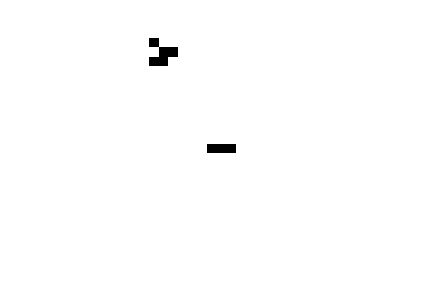
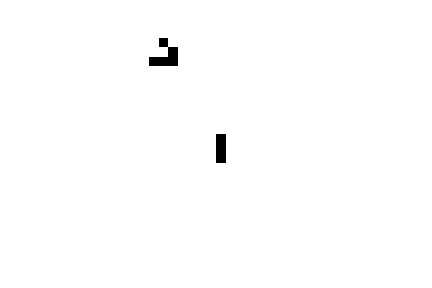
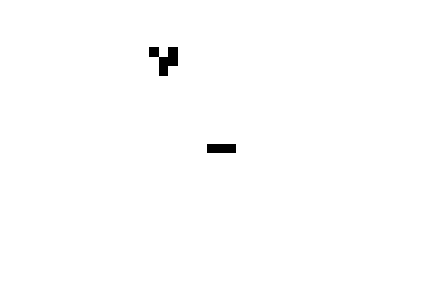
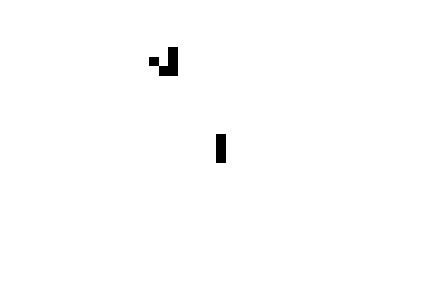
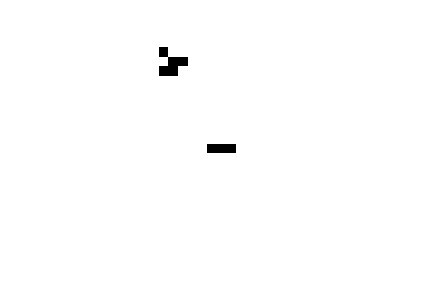
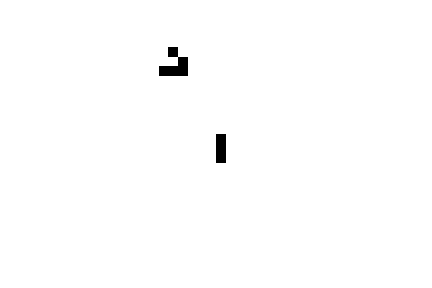
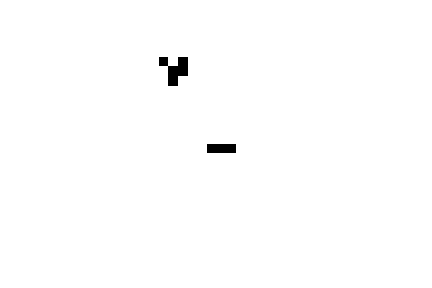
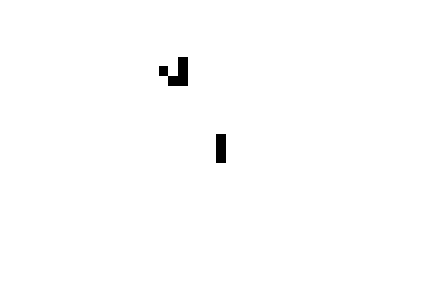
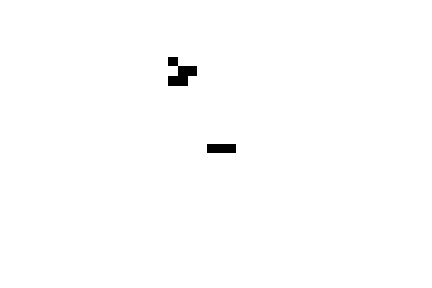
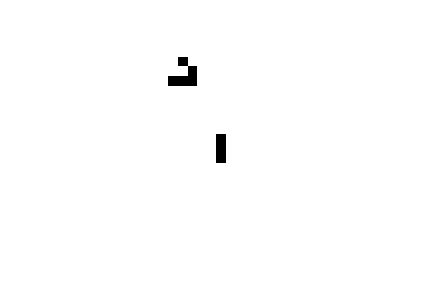
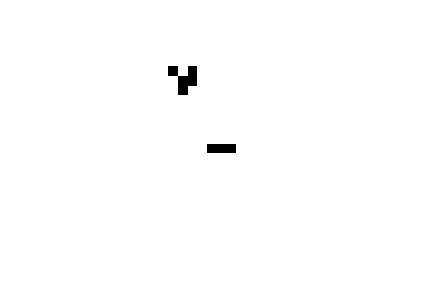
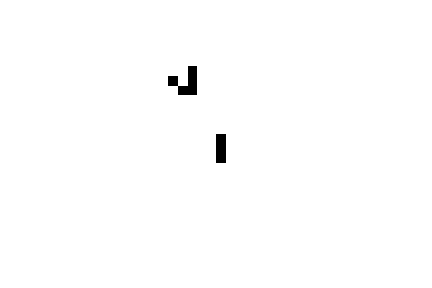
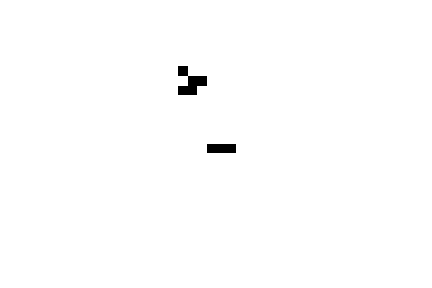
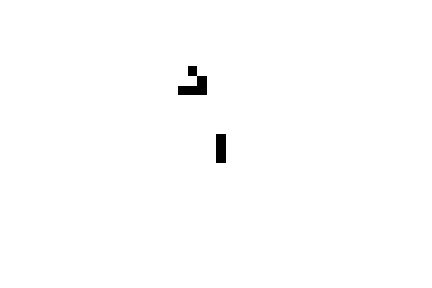
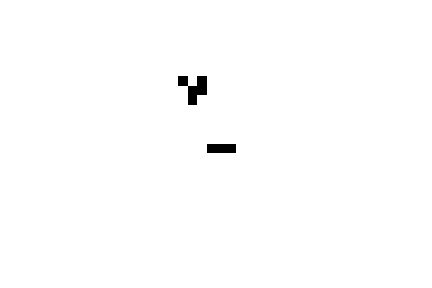
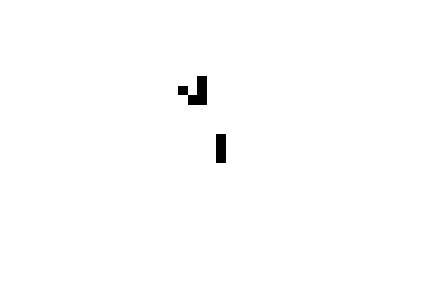
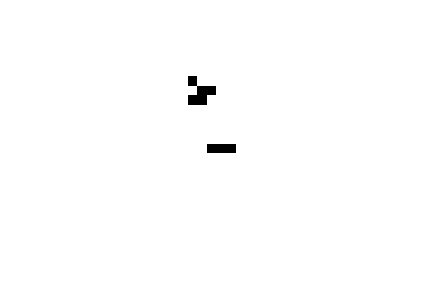
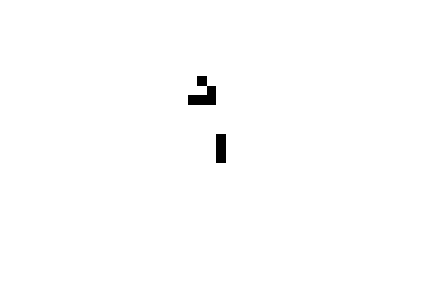
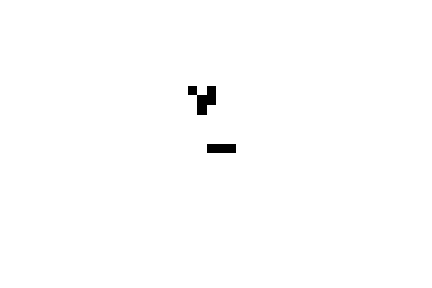
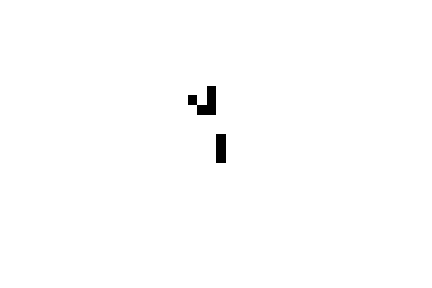
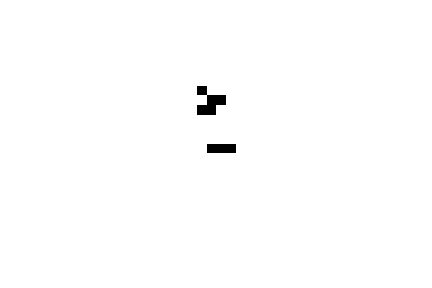
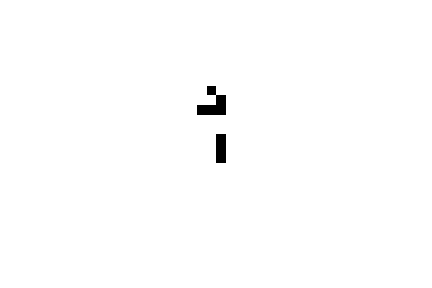
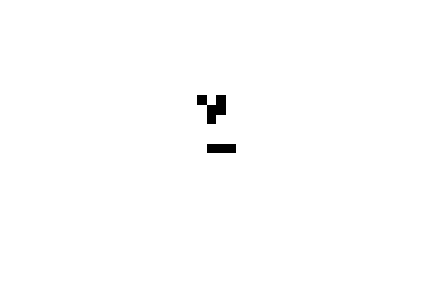
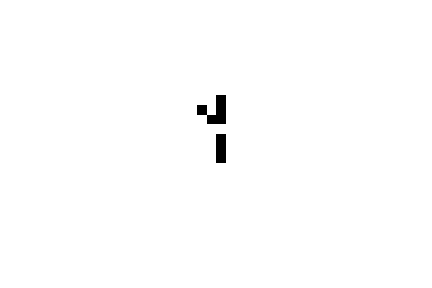
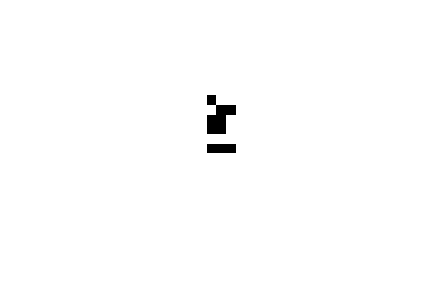
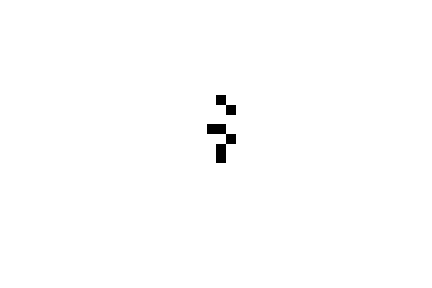
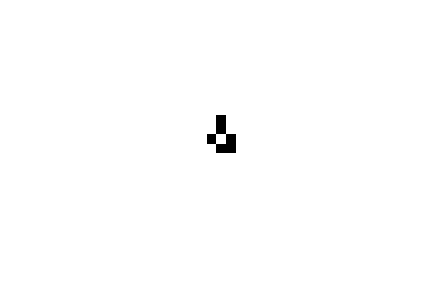
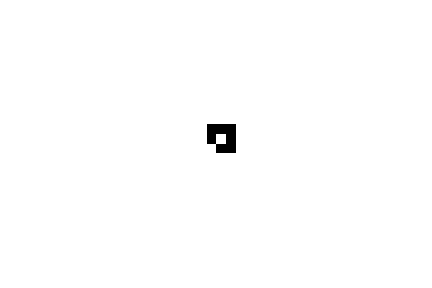
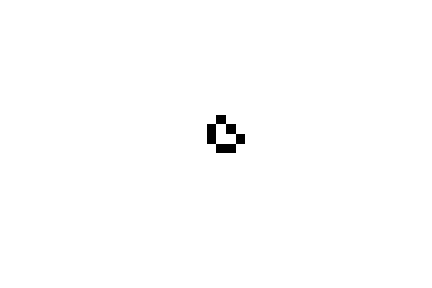
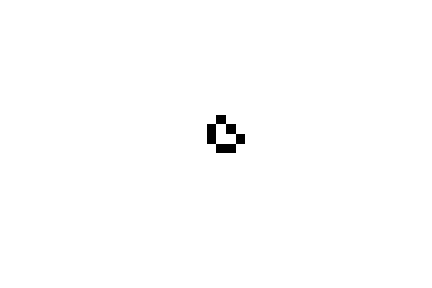
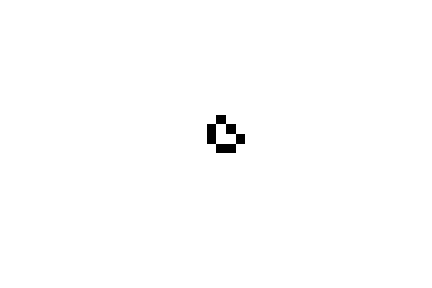
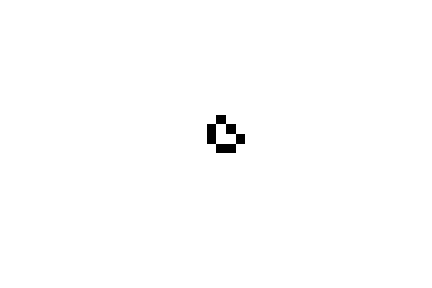
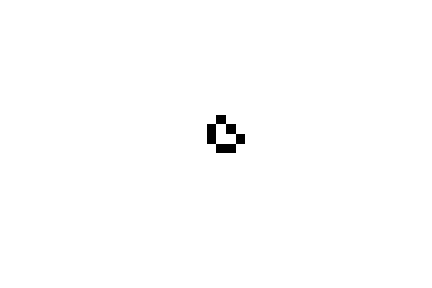
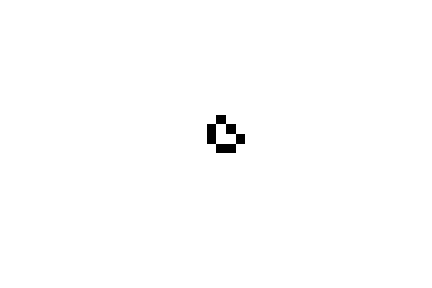
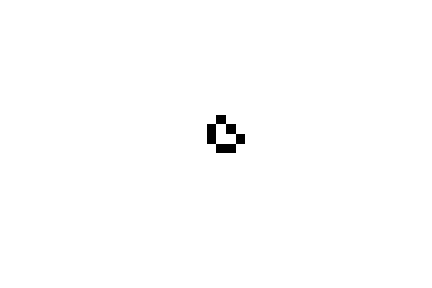
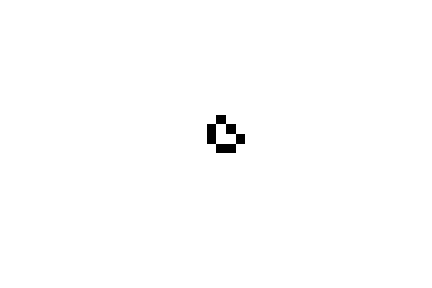
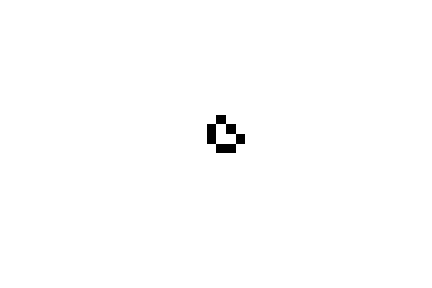
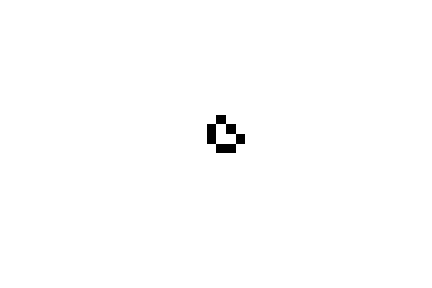
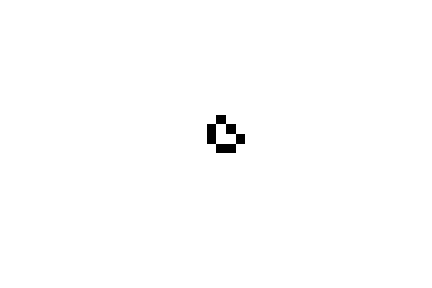
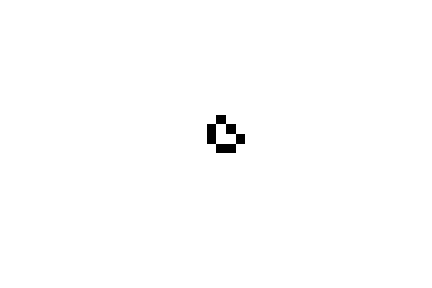
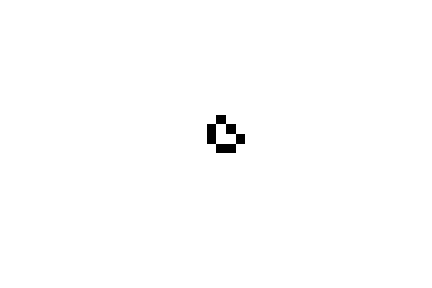
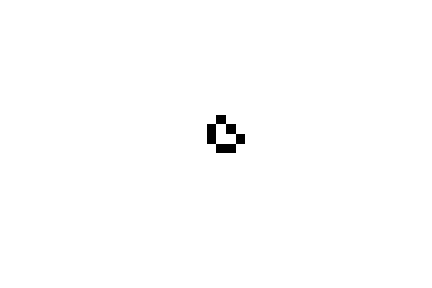
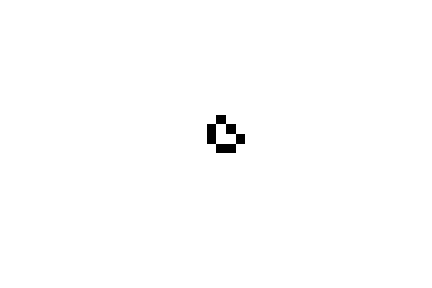
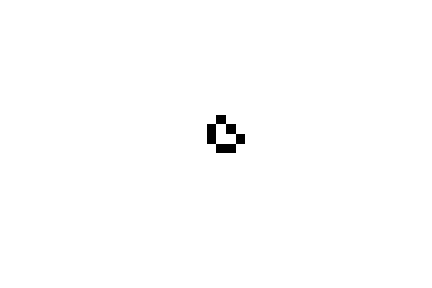
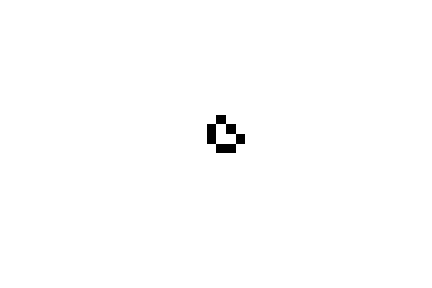
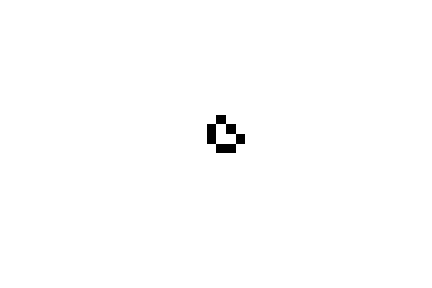
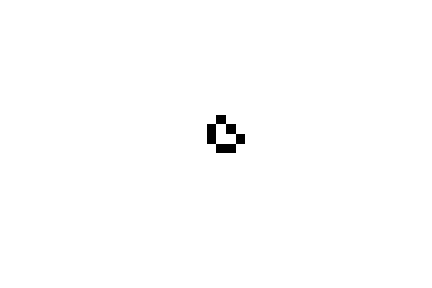
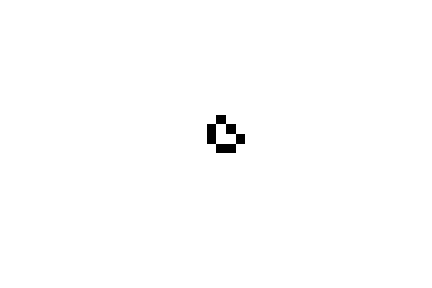
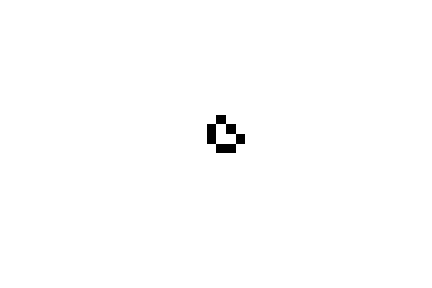
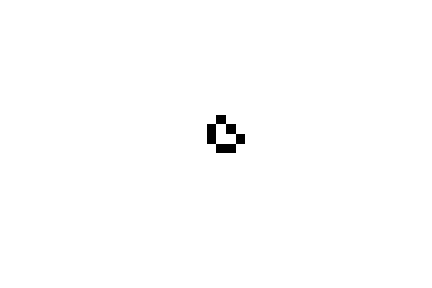
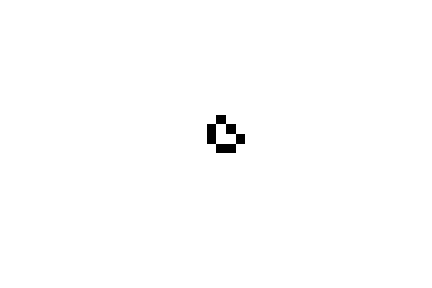
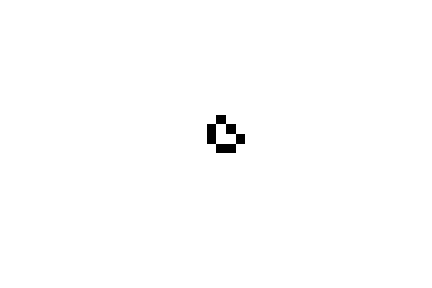
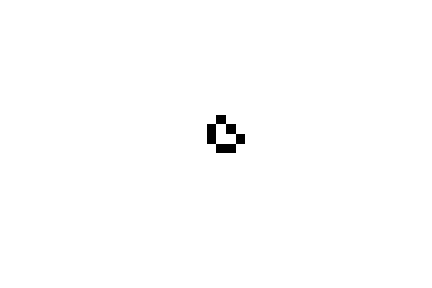
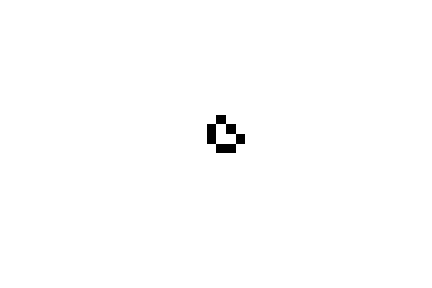
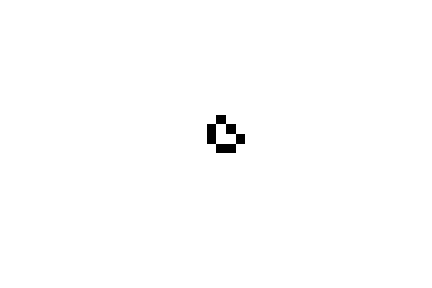
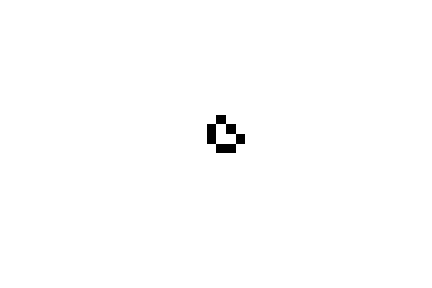
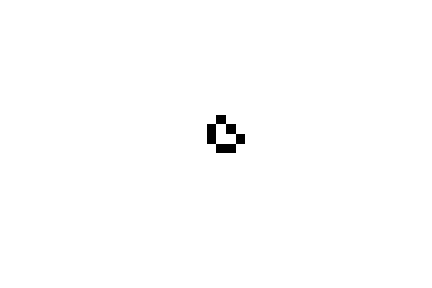
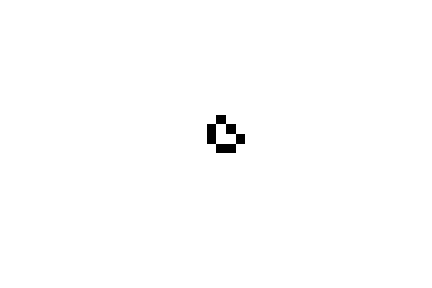
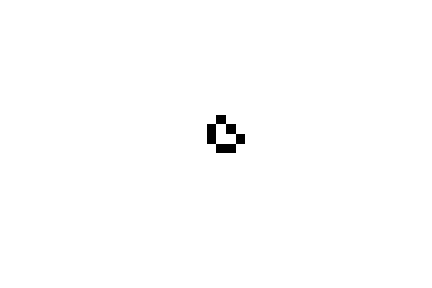
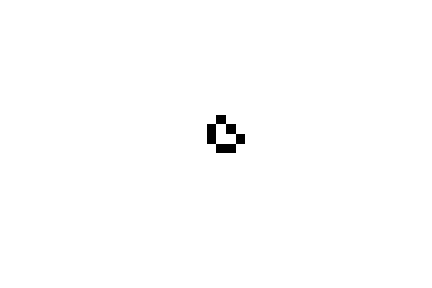
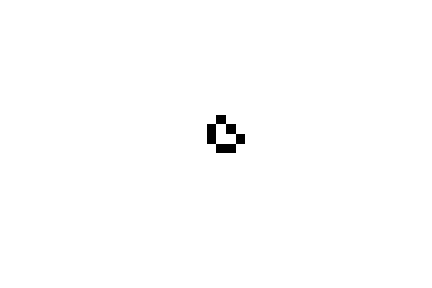
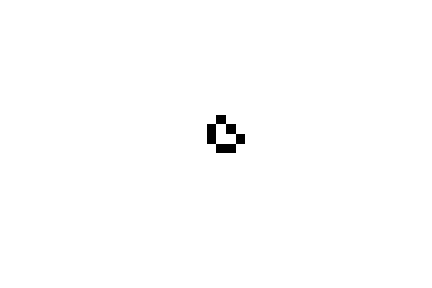
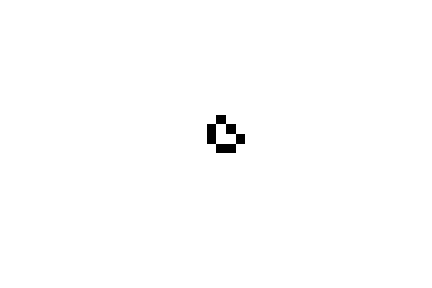
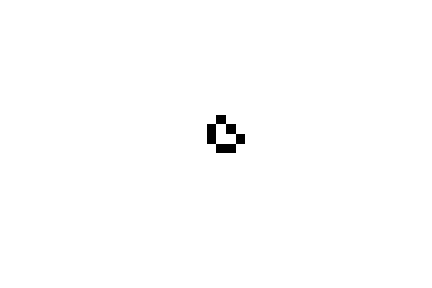
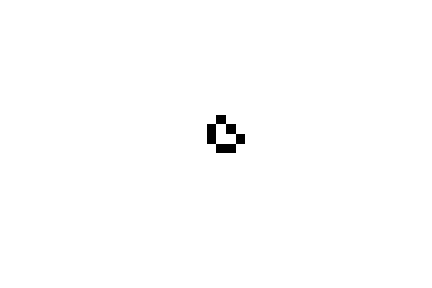
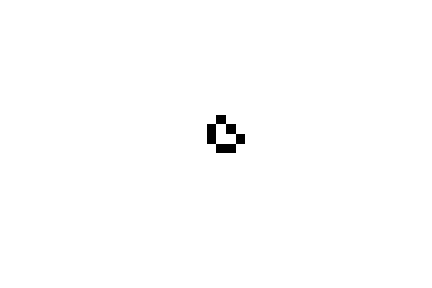
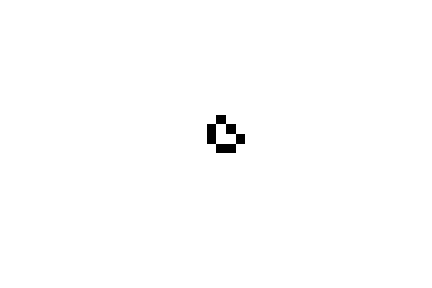
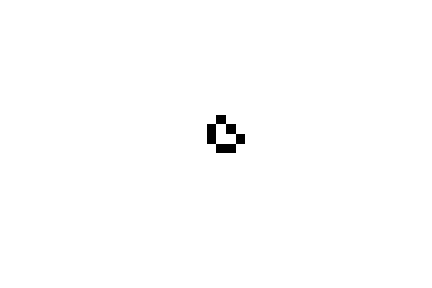
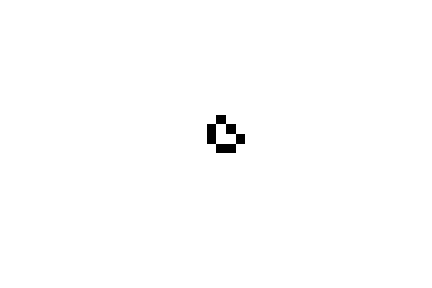
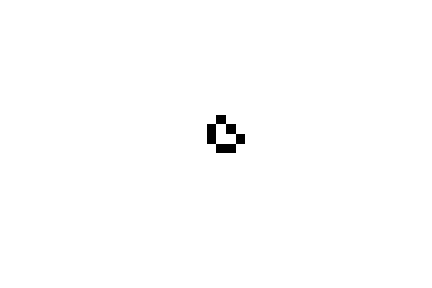
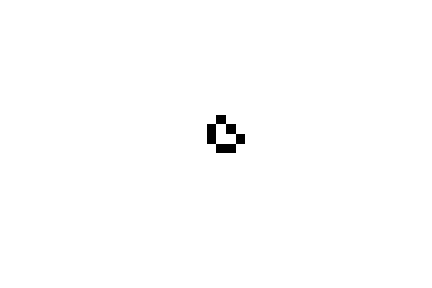
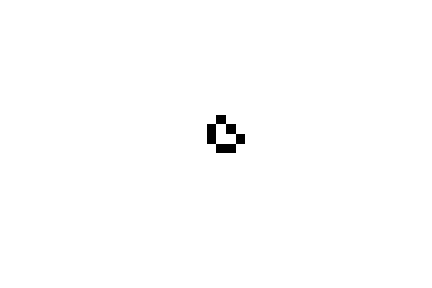
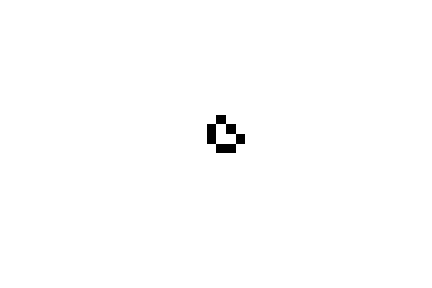
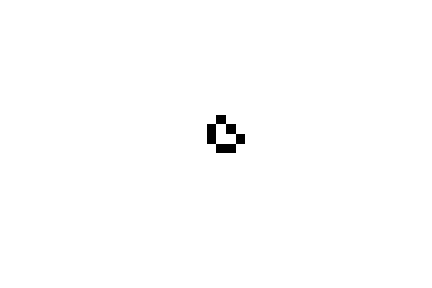
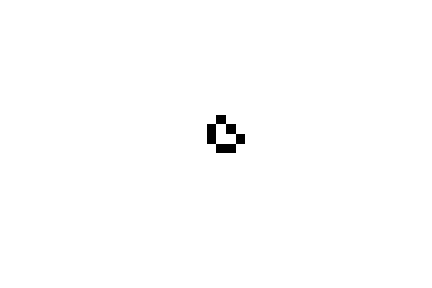
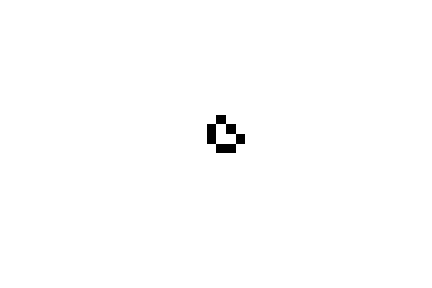
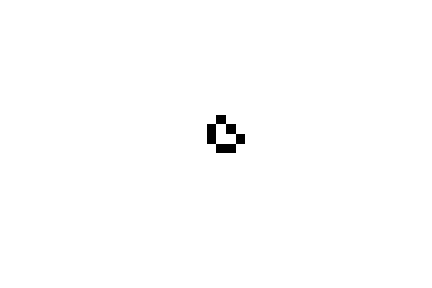
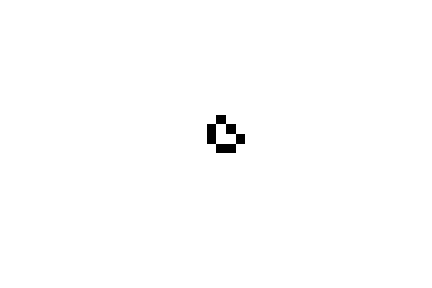
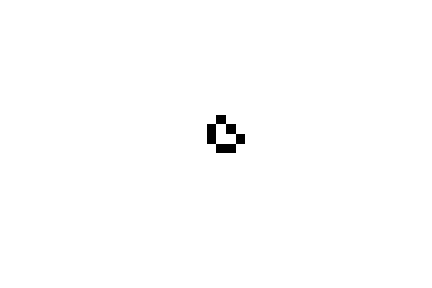
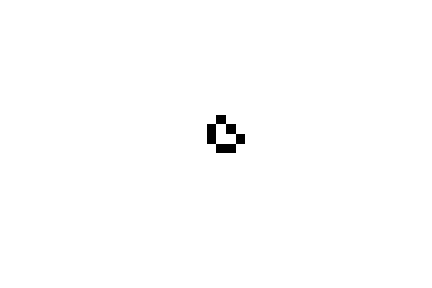
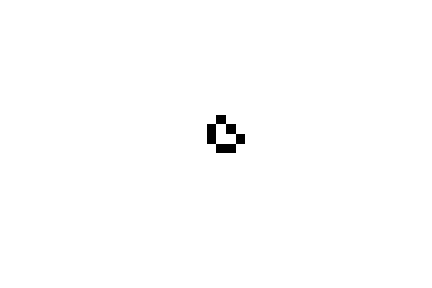
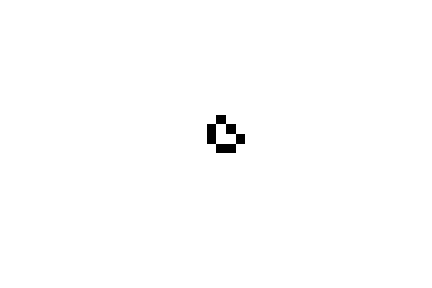
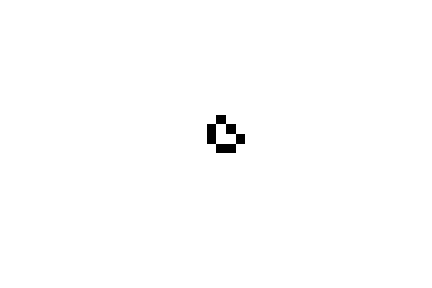
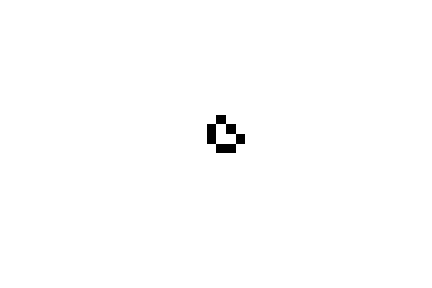
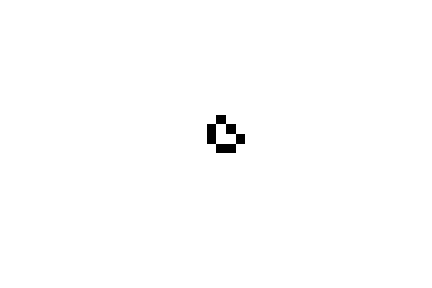
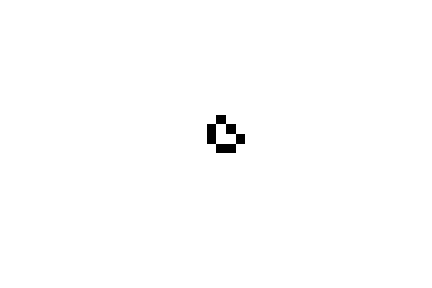
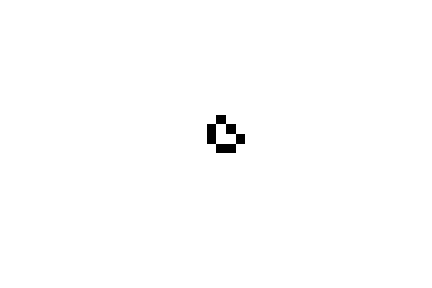
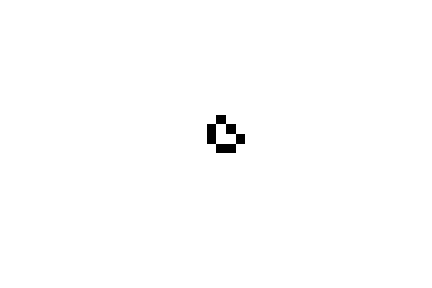
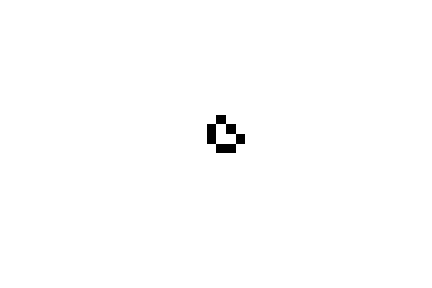
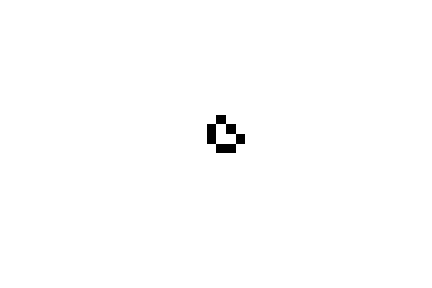
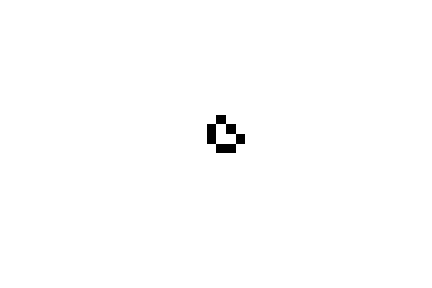
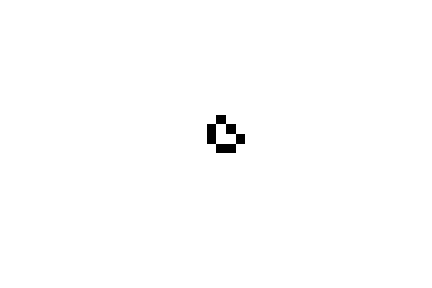
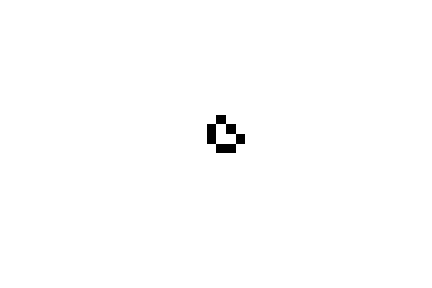
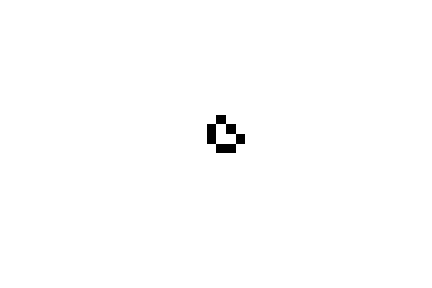
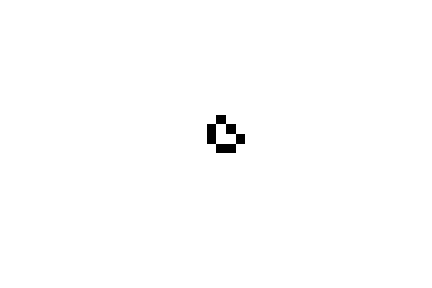
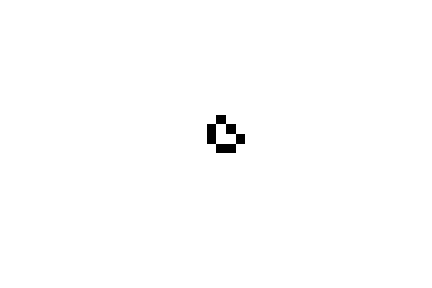
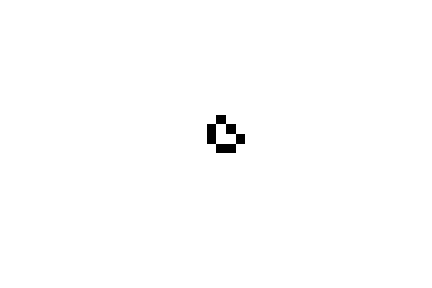
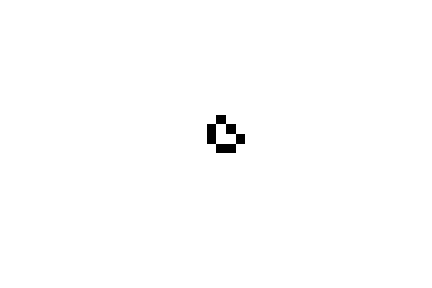
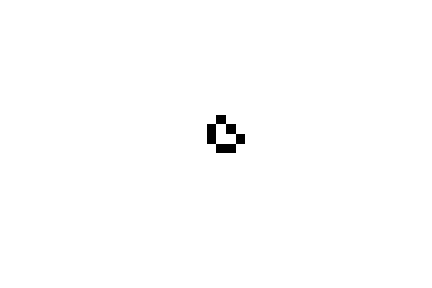
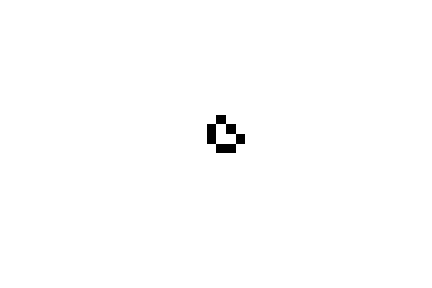

In [4]:
you = [[1, 0, 0],
      [0, 1, 1],
      [1, 1, 0]]

me = [[0, 0, 0],
      [0, 0, 0],
      [0, 0, 0],
      [0, 0, 0],
      [1, 1, 1]]

X = np.zeros((30, 40))
X[4:7, 13:16] = you
X[11:16, 19:22] = me

run_simulation(X)